In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io, utils
from cellpose.io import imread
import os

In [2]:
#put pathway to your images below:
filepath = r"c:\Users\S229504\Pictures\im24.02.26"

#changeDirectory to filepath specified
os.chdir(filepath)
files = os.listdir()
print(files)
print(len(files)) #the output number should match the number of images in your fold


model = models.Cellpose(gpu=False, model_type='cyto2')
channels = [[0,0]]

['1-1-red.tif', '1-2-red.tif', '10-1-red.tif', '10-2-red.tif', '11-1-red.tif', '11-2-red.tif', '12-1-red.tif', '12-2-red.tif', '13-1-red.tif', '13-2-red.tif', '14-1-red.tif', '14-2-red.tif', '15-1-red.tif', '15-2-red.tif', '16-1-red.tif', '16-2-red.tif', '17-1-red.tif', '17-2-red.tif', '18-1-red.tif', '18-2-red.tif', '19-1-red.tif', '19-2-red.tif', '2-1-red.tif', '2-2-red.tif', '20-1-red.tif', '20-2-red.tif', '21-1-red.tif', '21-2-red.tif', '22-1-red.tif', '22-2-red.tif', '23-1-red.tif', '23-2-red.tif', '24-1-red.tif', '24-2-red.tif', '3-1-red.tif', '3-2-red.tif', '4-1-red.tif', '4-2-red.tif', '5-1-red.tif', '5-2-red.tif', '6-1-red.tif', '6-2-red.tif', '7-1-red.tif', '7-2-red.tif', '8-1-red.tif', '8-2-red.tif', '9-1-red.tif', '9-2-red.tif', 'note.txt']
49


100%|██████████| 25.3M/25.3M [00:01<00:00, 20.0MB/s]
100%|██████████| 3.54k/3.54k [00:00<?, ?B/s]


In [3]:
for i in files:
    #sci-kit image API to convert image to Numpy array
    image = io.imread(i)
    masks = model.eval(image, diameter=18.0, channels=channels)
    print(masks)
    masks, flows, styles, diams = model.eval(image, diameter=18.8, channels=channels)
    io.save_to_png(image, masks, flows, i)
    io.masks_flows_to_seg(image, masks, flows, i, diams = 18, channels=channels)
    io.save_rois(masks, i)
    
    

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), [array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [1, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [3, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 0, 1],
        [4, 0, 1],
        [4, 

ERROR: could not read file, 'NoneType' object has no attribute 'ndim'


AttributeError: 'NoneType' object has no attribute 'squeeze'

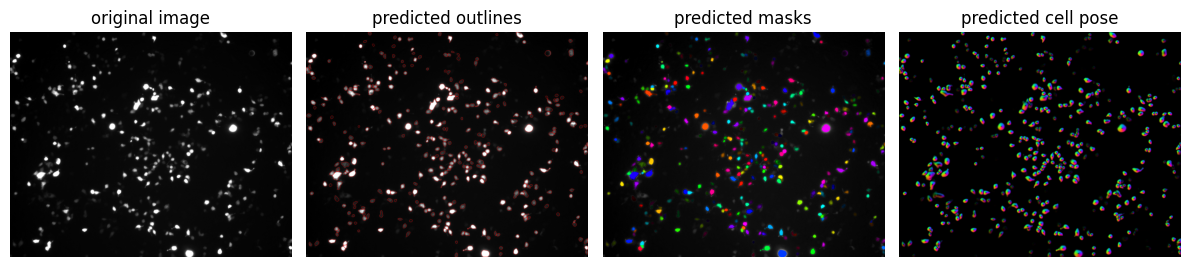

In [ ]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()